## Import required modules

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

## Read image 

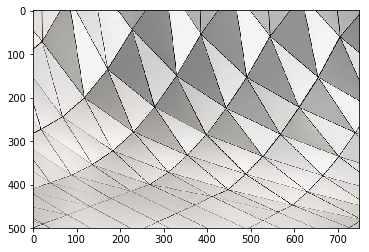

In [56]:
# Read in the image
image = cv2.imread('photo-1502370414204-7e128f26d730.jpeg')
plt.imshow(image)

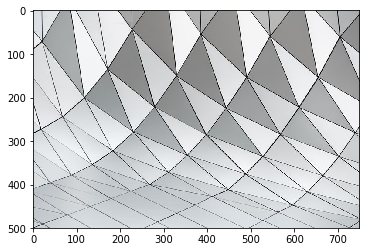

In [57]:
# Above image look quite wierd because opencv read in BGR color space by defalut . 
# let's fix this by converting BGR to RGB color space.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

# Now it looks great

## Convert this image in gray scale

In [46]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

## Detect edges using Harris Corner in openCV 

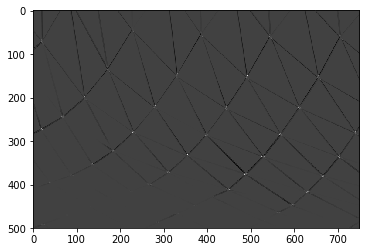

In [47]:
# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
plt.imshow(dst, cmap="gray")
# I know image not looks good

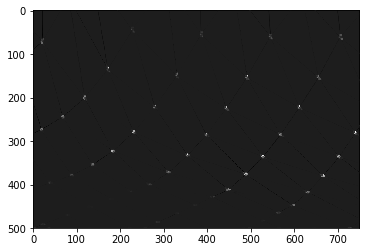

In [48]:
# Apply dilation image to enhance corner points
dst = cv2.dilate(dst,None)
plt.imshow(dst, cmap='gray')

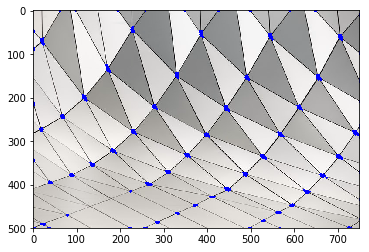

In [53]:
# Define your threshold ("you can vary it according to your wish")

thresh = 0.01*dst.max()

# Create copy of rgb image to draw corners on it.
corner_image = np.copy(image)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,0,255), 1)

plt.imshow(corner_image)

## Use matplotlib to save your corners_image in local directory 

In [54]:
plt.imsave("_cornerDetected_image.jpg",corner_image)